In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler

In [3]:
init_df = pd.read_csv('./data/filtered_mental_health_data.csv')
init_df.shape

(5001, 594)

In [4]:
df = init_df.copy()
df_filtered = df[df.columns[~df.columns.str.match(r'^(D_|DSM_)')]]
df_filtered.shape

(5001, 552)

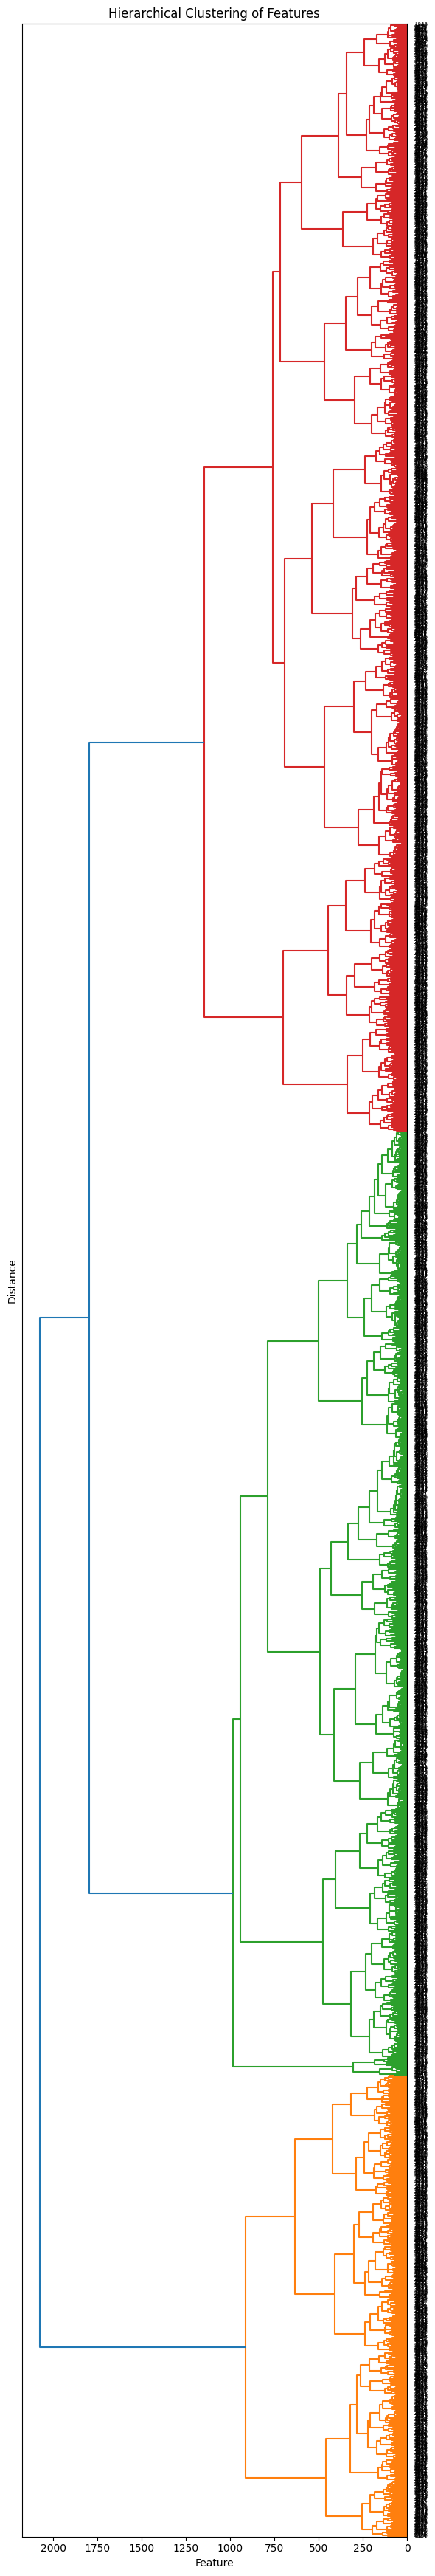

In [5]:
linked = linkage(df_filtered, method='ward')

# Step 3: Plot dendrogram with feature names
plt.figure(figsize=(6, 35))
dendrogram(linked, labels=df_filtered.index, orientation="left", show_leaf_counts=True)
plt.title("Hierarchical Clustering of Features")
plt.xlabel("Feature")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


    feature  cluster
0        M1        1
331    SA7A        1
330     SA6        1
329     SA5        1
328     SA4        1
..      ...      ...
132   CN7_3        4
130     CN6        4
129     CN5        4
136    CN13        4
551  INC_HI        4

[552 rows x 2 columns]


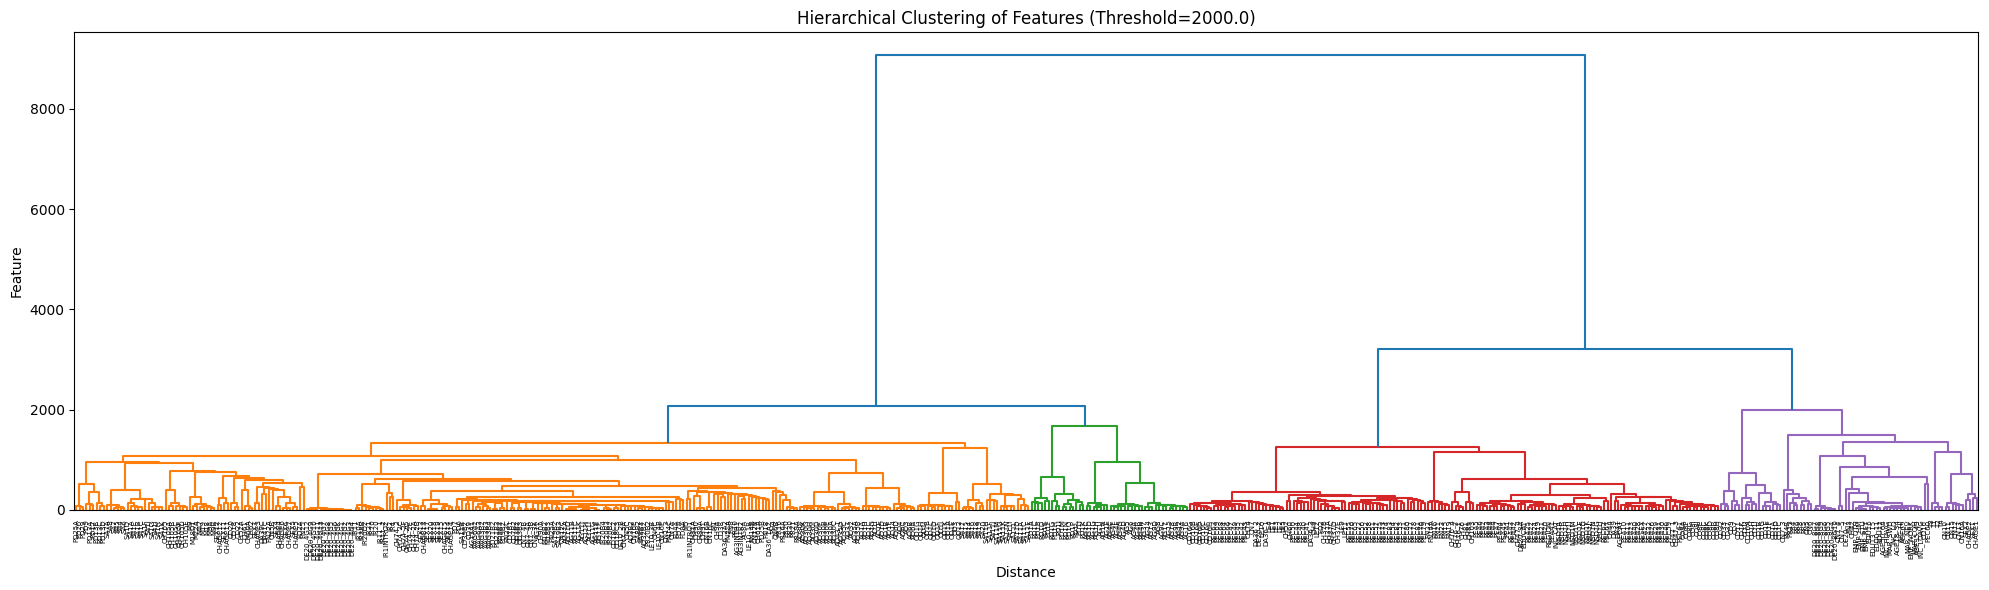

In [ ]:
df_numeric = df_filtered.select_dtypes(include=[np.number])
df_transposed = df_numeric.T
linked = linkage(df_transposed, method='ward')
distance_threshold = 2000.0
cluster_labels = fcluster(linked, t=distance_threshold, criterion='distance')

clusters_df = pd.DataFrame({
    'feature': df_transposed.index,
    'cluster': cluster_labels
}).sort_values('cluster')

print(clusters_df)

plt.figure(figsize=(20, 6))
dendrogram(
    linked, 
    labels=df_transposed.index, 
    color_threshold=distance_threshold
)
plt.title(f"Hierarchical Clustering of Features (Threshold={distance_threshold})")
plt.xlabel("Distance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()